# Objective 
- What is the overall sales trend?
- What are the top 10 products by sales?
- What are the msot selling products?
- What is the most preffered shipping mode?
- Which are the most profitable categories and sub categories?


In [7]:
# DATA MANIPULATION
import pandas as pd

# DATA VISUALISATION
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


In [8]:
df= pd.read_excel('superstore_sales.xlsx')

In [9]:
# First five rows of data set
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [10]:
#Shape of data set
df.shape


(51290, 21)

In [11]:
# Number of columns Present in data set
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [12]:
#Summary of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [13]:
#Check for Misssing Data in data set
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [14]:
# Get the descriptive Statistics of data set
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


Exploratory Data Analysis :

In [16]:
# what is the overall sales trend?
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [17]:
# Last Order Date
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [40]:
df['Month_Year'] = pd.to_datetime(df['Month_Year'])

In [45]:
#Ensuring 'sales' column is numeric
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [48]:
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

In [51]:
 #Grouping Month Year
 df_trend=df.groupby('Month_Year')['sales'].sum().reset_index()

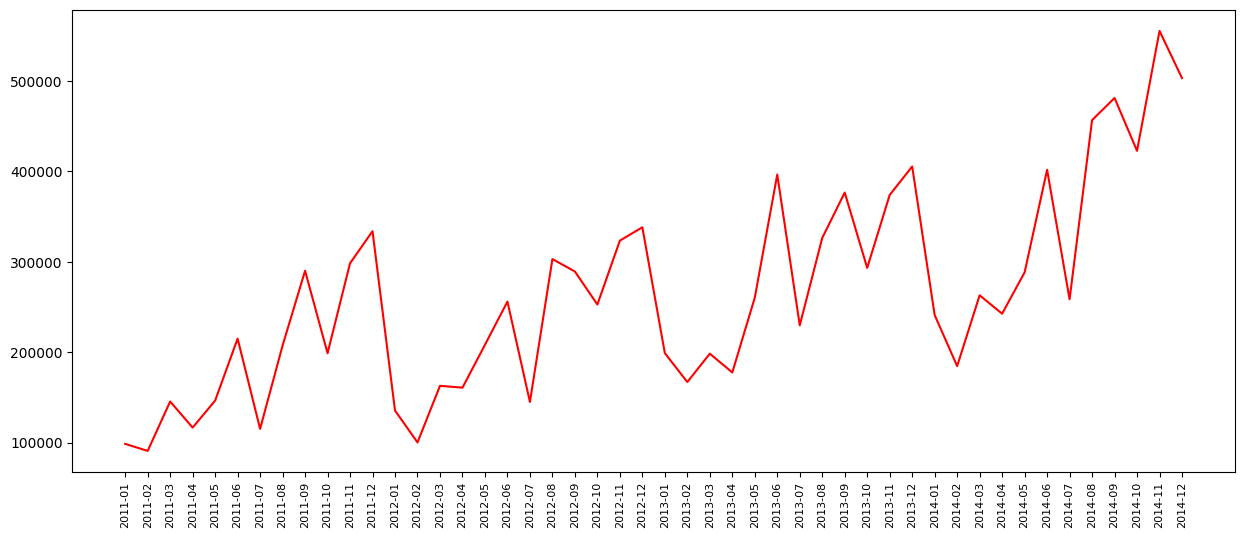

In [57]:
#set figure size
plt.figure(figsize=(15,6))

#plottting the sales trend
plt.plot(df_trend['Month_Year'], df_trend['sales'], color='r')
plt.xticks(rotation='vertical', size=8)
plt.show()

What are the top 10 product by sales?

In [58]:
#grouping product name column
prod_sales=df.groupby('product_name')['sales'].sum().reset_index()

In [61]:
#sorting prod sales column in descending order
prod_sales=prod_sales.sort_values(by=['sales'], ascending=False)

In [62]:
#Top 10 products by sales
prod_sales[:10]

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240
1837,"Hon Executive Leather Armchair, Adjustable",58193.4841
2631,"Office Star Executive Leather Armchair, Adjust...",50661.6840
1714,"Harbour Creations Executive Leather Armchair, ...",50121.5160
2988,"Samsung Smart Phone, Cordless",48653.4600
2502,"Nokia Smart Phone, with Caller ID",47877.7857


Which are the most selling products?

In [67]:
#grouping product name column
most_sold=pd.DataFrame(df.groupby('product_name')['quantity'].sum())

In [68]:
#sorting Most sold column in descending order
most_sold=most_sold.sort_values(by=['quantity'], ascending=False)

In [69]:
most_sold[:10]

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


What is the most preffered ship mode?

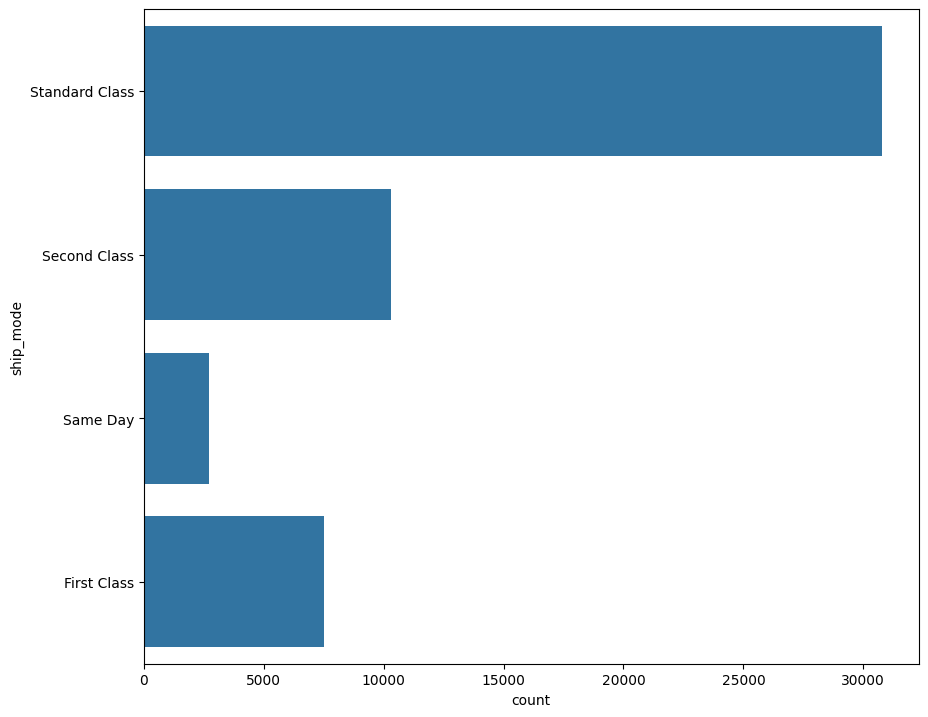

In [76]:
#setting figure size
plt.figure(figsize=(10,8.5))
#plotting ship mode
sns.countplot(df['ship_mode'])
plt.show()

Which are the most profitable Category and Sub-category?

In [81]:
#Grouping Categories
categ_profit=pd.DataFrame(df.groupby(['category','sub_category'])['sales'].sum())

In [82]:
#Sorting values based on sales
categ_profit.sort_values(['category','sales'], ascending=False)

sales
category        sub_category              
Technology      Phones        1.706824e+06
                Copiers       1.509436e+06
                Machines      7.790601e+05
                Accessories   7.492370e+05
Office Supplies Storage       1.127086e+06
                Appliances    1.011064e+06
                Binders       4.619115e+05
                Art           3.720920e+05
                Paper         2.442917e+05
                Supplies      2.430742e+05
                Envelopes     1.709043e+05
                Fasteners     8.324232e+04
                Labels        7.340403e+04
Furniture       Chairs        1.501682e+06
                Bookcases     1.466572e+06
                Tables        7.570419e+05
                Furnishings   3.855783e+05